In [151]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
import xgboost as xgb


In [153]:
data = pd.read_csv('cleanedData.csv')
print(data.shape)
data.head()

(2930, 76)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,HasFence
0,1,526301100,20,RL,141.0,31770,1,IR1,Lvl,AllPub,...,0,0,NoFence,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,1,Reg,Lvl,AllPub,...,0,120,MnPrv,0,6,2010,WD,Normal,105000,1
2,3,526351010,20,RL,81.0,14267,1,IR1,Lvl,AllPub,...,0,0,NoFence,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,1,Reg,Lvl,AllPub,...,0,0,NoFence,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,1,IR1,Lvl,AllPub,...,0,0,MnPrv,0,3,2010,WD,Normal,189900,1


In [154]:
X, y = data.drop("SalePrice", axis = 'columns'), data['SalePrice']
X.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,HasFence
0,1,526301100,20,RL,141.0,31770,1,IR1,Lvl,AllPub,...,0,0,0,NoFence,0,5,2010,WD,Normal,0
1,2,526350040,20,RH,80.0,11622,1,Reg,Lvl,AllPub,...,0,0,120,MnPrv,0,6,2010,WD,Normal,1
2,3,526351010,20,RL,81.0,14267,1,IR1,Lvl,AllPub,...,0,0,0,NoFence,12500,6,2010,WD,Normal,0
3,4,526353030,20,RL,93.0,11160,1,Reg,Lvl,AllPub,...,0,0,0,NoFence,0,4,2010,WD,Normal,0
4,5,527105010,60,RL,74.0,13830,1,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,1


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

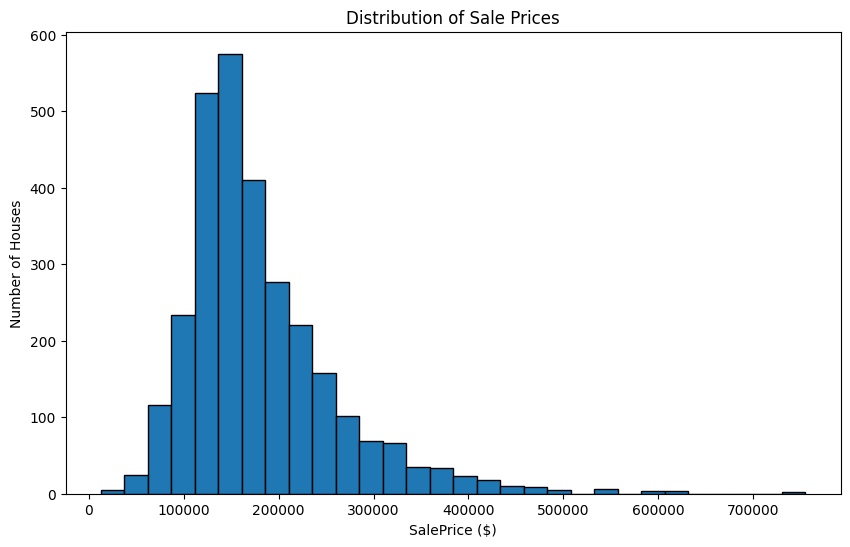

In [157]:
plt.figure(figsize=(10,6))
plt.hist(data['SalePrice'], bins=30, edgecolor='black')
plt.title("Distribution of Sale Prices")
plt.xlabel("SalePrice ($)")
plt.ylabel("Number of Houses")
plt.show()

In [158]:
data['SalePrice'].value_counts().sort_index()

SalePrice
12789     1
13100     1
34900     1
35000     1
35311     1
         ..
611657    1
615000    1
625000    1
745000    1
755000    1
Name: count, Length: 1032, dtype: int64

ideal ar fi sa avem pana in 100 de instante in fiecare bin (30 bins cu numar aproape egal de instante)
sau mai mare/mic decat media?
sau poate trebuie dupa distributia in 30 de bins facuta in graficul de deasupra?

In [159]:
total = 0 
bins = 0
lims = [] #limita superioara = valori pana la ....
frequency = [] #numarul de valori pana la limita superioara corespunzatoare
sorted_values = data['SalePrice'].value_counts().sort_index()
for i, j in sorted_values.items():
    if total + j > 100:
        bins += 1 
        lims.append(str(i))
        frequency.append(total)
        total = j
    else:
        total = total + j
print(bins)
print(lims)
print(frequency)

30
['81500', '95000', '106000', '113000', '119000', '124000', '128000', '131000', '135000', '138000', '141500', '145000', '148800', '154000', '159000', '164990', '170440', '176000', '181000', '187500', '194500', '204000', '214000', '225000', '237000', '252678', '272000', '300000', '338931', '438780']
[100, 98, 99, 98, 90, 98, 99, 97, 76, 92, 100, 77, 99, 99, 100, 100, 100, 89, 96, 98, 100, 97, 98, 96, 98, 100, 100, 98, 100, 100]


<BarContainer object of 30 artists>

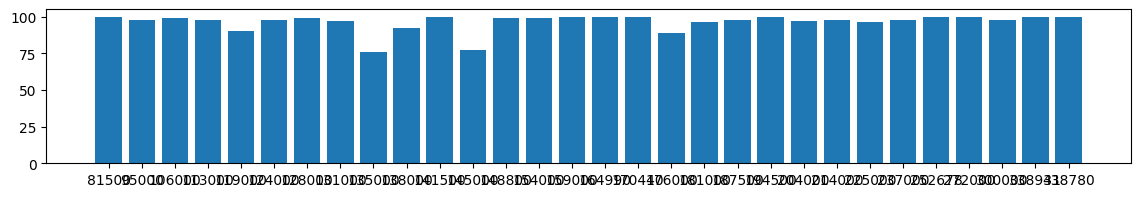

In [160]:
plt.figure(figsize=(14, 2))
display(plt.bar(np.array(lims), np.array(frequency)))

In [161]:
lims_numeric = sorted([int(x) for x in lims])
lims_numeric.append(int(data['SalePrice'].max() + 1))
y_classEq = pd.cut(data['SalePrice'], bins=[0]+lims_numeric, labels=False, include_lowest=True)
y_classEq = y_classEq.astype(int)


In [162]:
X_numeric = pd.get_dummies(X) 
X_trainEq10, X_testEq10, y_trainEq10, y_testEq10 = train_test_split(
    X_numeric, y_classEq, test_size=0.1, random_state=42
)

In [163]:
modelEq10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelEq10.fit(X_trainEq10, y_trainEq10)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [164]:
y_predEq10 = modelEq10.predict(X_testEq10)
print("Predictions:", y_predEq10)

y_probEq10 = modelEq10.predict_proba(X_testEq10)


print("\n Accuracy:", accuracy_score(y_testEq10, y_predEq10))
print("\n Classification Report:\n")
    #   classification_report(y_test10, y_pred10, target_names=y_class))

print("\n Predicted class labels:", y_predEq10[:5])
print(" Actual class labels   :", y_testEq10[:5])

print("\n Predicted probabilities for first 5 samples:\n", y_probEq10[:5])

Predictions: [ 8  4 21  1  4 21  8 12  1 29 19 23  0 11  7 13 10 20  7 11 22 16 20 21
 18 29 29 22 20 19 18  1 25  1  2  1 19 27 22 27 29 25 23 20  2 29 17 11
 17  3 17  8  4 22 22 21 20  2 27  8  0 11  0 28 25 12  4 27 18 18 24 21
 28  0 14 29 17 25 17 10 14 11  9 20 27 10 10  6 21 30 22  1  9  0 22 15
  0 21 22 28  1 27 30 29 25 10 26 22 11  3 25  9  4  2 22  6 21 27 22 16
  4  3  8  4  2 30  9 23 16 25  6 16 14  2 28 24 12 14 26 21 24 26 17 21
 16  4 19 26 14  4 22 29  8 27  8 17 27  0 16 10 27  2 27 10 11 20 30 25
 26 26  8  2 27 29  8 30 13  0  0 11 25 18 13  0  2 19  0 27 21 11 15 29
  4 27  4  3 10 14 17  3  4 17 11 25 22 30 12  1 13  0  9 27 23 26 25  0
 29 20  6 28  2 29 26 16  1  1 23 25 13 23 20 18 13 25  8 21 16 29 15 22
 20 17 24  3 25 23 28 25 18 29 12  3 11 14 25  0  8  7 19  1  3 23 25  6
 27  4  5 29  3 10 18  2 15  7 26  2  6 11 21 20 29 17 24 21 11 28 26 11
 18  6  4 15 25]

 Accuracy: 0.23890784982935154

 Classification Report:


 Predicted class labels: [ 8  4 21 

In [165]:
X_trainEq20, X_testEq20, y_trainEq20, y_testEq20 = train_test_split(
    X_numeric, y_classEq, test_size=0.2, random_state=42
)


In [166]:
modelEq20 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelEq20.fit(X_trainEq20, y_trainEq20)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [167]:
y_predEq20 = modelEq20.predict(X_testEq20)
# print("Predictions:", y_pred20)

y_probEq20 = modelEq20.predict_proba(X_testEq20)


print("\n Accuracy:", accuracy_score(y_testEq20, y_predEq20))
print("\n Classification Report:\n")
    #   classification_report(y_test10, y_pred10, target_names=y_class))

print("\n Predicted class labels:", y_predEq20[:5])
print(" Actual class labels   :", y_testEq20[:5])

print("\n Predicted probabilities for first 5 samples:\n", y_probEq20[:5])


 Accuracy: 0.2098976109215017

 Classification Report:


 Predicted class labels: [ 6  4 23  1  2]
 Actual class labels   : 1357    15
2367     4
2822    21
2126     5
1544     6
Name: SalePrice, dtype: int64

 Predicted probabilities for first 5 samples:
 [[2.75666430e-03 6.10823277e-03 5.89126814e-03 7.23303761e-03
  1.36029366e-02 4.40067388e-02 2.48245835e-01 3.88958156e-02
  5.21826856e-02 8.23533833e-02 1.31729254e-02 1.08768214e-02
  7.03290664e-03 4.45832387e-02 4.35836054e-02 3.53704430e-02
  6.40318617e-02 6.52192254e-03 8.25631246e-02 6.96103461e-03
  7.23701390e-03 2.48016641e-02 1.71832927e-02 7.01800408e-03
  5.37289269e-02 1.72068961e-02 1.03132930e-02 3.06022093e-02
  1.28126638e-02 1.99523545e-03 1.12631125e-03]
 [2.22235243e-03 1.34795815e-01 6.26967102e-02 1.77598655e-01
  3.55424345e-01 5.71535043e-02 6.87107742e-02 6.78513758e-03
  2.17285082e-02 6.75426237e-03 5.54681476e-03 7.06266146e-03
  2.13904139e-02 2.76027229e-02 1.88095458e-02 6.06829487e-03
  8.85833800

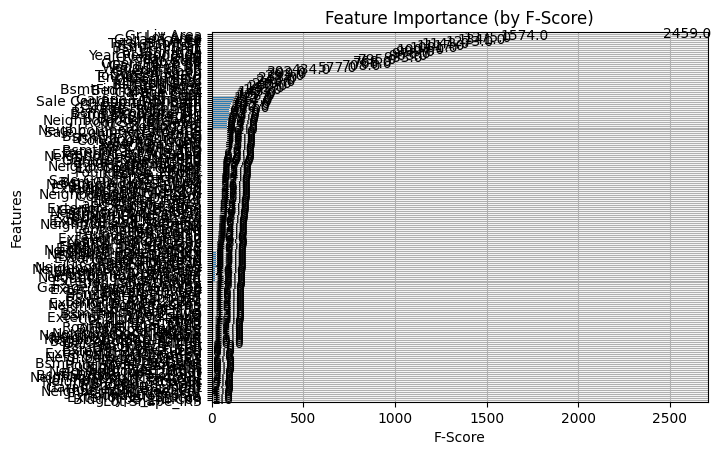

In [168]:
from xgboost import plot_importance
plot_importance(modelEq20, importance_type='weight', xlabel='F-Score')
plt.title("Feature Importance (by F-Score)")
plt.show()

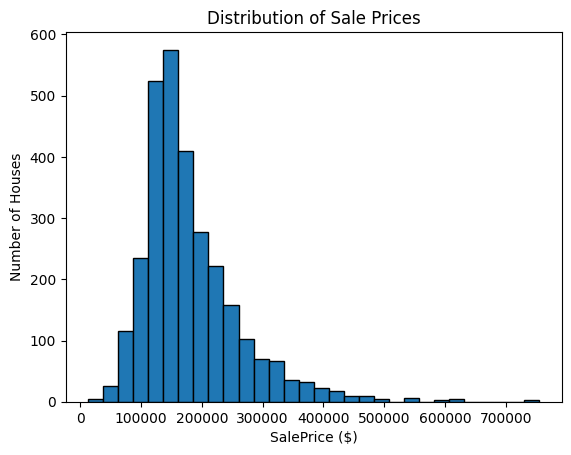

[ 12789.          37529.36666667  62269.73333333  87010.1
 111750.46666667 136490.83333333 161231.2        185971.56666667
 210711.93333333 235452.3        260192.66666667 284933.03333333
 309673.4        334413.76666667 359154.13333333 383894.5
 408634.86666667 433375.23333333 458115.6        482855.96666667
 507596.33333333 532336.7        557077.06666667 581817.43333333
 606557.8        631298.16666667 656038.53333333 680778.9
 705519.26666667 730259.63333333 755000.        ]


In [170]:
counts, classes, patches = plt.hist(data['SalePrice'], bins=30, edgecolor='black')

plt.title("Distribution of Sale Prices")
plt.xlabel("SalePrice ($)")
plt.ylabel("Number of Houses")
plt.show()
print(classes)

In [171]:
y_classNE = pd.cut(data['SalePrice'], bins=[0]+classes, labels=False, include_lowest=True)
y_classNE = y_classNE.astype(int)

In [172]:
X_trainNE10, X_testNE10, y_trainNE10, y_testNE10 = train_test_split(
    X_numeric, y_classNE, test_size=0.1, random_state=42
)

In [173]:
modelNE = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelNE.fit(X_trainNE10, y_trainNE10)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23], got [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 23 24 29]